In [1]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import statsmodels.api as sm
import scipy.stats as st

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_selection import chi2, RFECV

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier

from mlxtend.classifier import MultiLayerPerceptron, SoftmaxRegression, StackingClassifier
from mlxtend.plotting import plot_confusion_matrix, plot_decision_regions, plot_learning_curves, plot_sequential_feature_selection

import xgboost as xgb
import lightgbm as lgbm
import catboost as cb

C:\Users\sngupta\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize']= (15, 12)
plt.rcParams['font.size']= 12
plt.style.use('ggplot')

In [4]:
sns.set(style= 'darkgrid', color_codes= True)

In [5]:
from datetime import datetime as dt

In [6]:
#read the data sets
train= pd.read_csv('train_1.csv')

In [7]:
test= pd.read_csv('test_1.csv')

In [8]:
train.dtypes.value_counts()

int64      37
object     12
float64     4
dtype: int64

In [9]:
train.head()

,area_assesed,building_id,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Damaged-Not used
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Damaged-Repaired and used
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Not damaged
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Damaged-Used in risk


In [10]:
test_building_id= test['building_id']

#now drop the building_id from the test and train 
train.drop(['building_id'], axis= 1, inplace= True)
test.drop(['building_id'], axis= 1, inplace= True)

In [11]:
train['damage_grade']= train['damage_grade'].map({'Grade 1': 0, 'Grade 2': 1, 'Grade 3': 2, 'Grade 4': 3, 'Grade 5': 4})

In [12]:
cat_var= [item for item in train.columns if train[item].dtypes=='O']

In [13]:
cat_var

['area_assesed',
 'legal_ownership_status',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'condition_post_eq']

In [14]:
train.columns

Index(['area_assesed', 'damage_grade', 'district_id', 'has_geotechnical_risk',
       'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'has_repair_started', 'vdcmun_id', 'ward_id', 'legal_ownership_status',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundatio

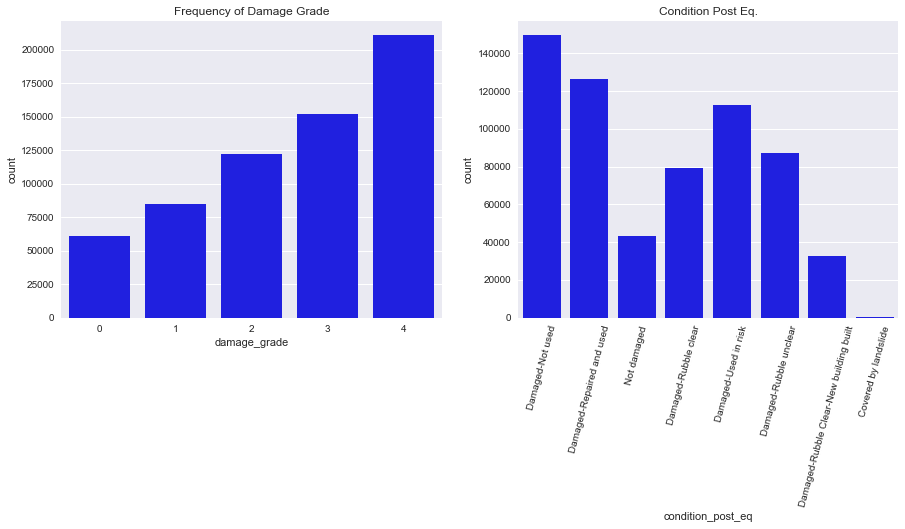

In [15]:
plt.subplot(221)
sns.countplot(train['damage_grade'], color= 'blue')
plt.title('Frequency of Damage Grade')

plt.subplot(222)
sns.countplot(train['condition_post_eq'], color= 'blue')
plt.title('Condition Post Eq.')
plt.xticks(rotation= 75)
plt.show()

In [16]:
#most of the houses are in severe condition are not used further beacuse the frequency of Grade 5 is more among the others
#and on the other hand the frequency of Damaged_Not used is also more among the others

In [17]:
geotech_risk= train[['has_geotechnical_risk',
       'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall', 'damage_grade']] 

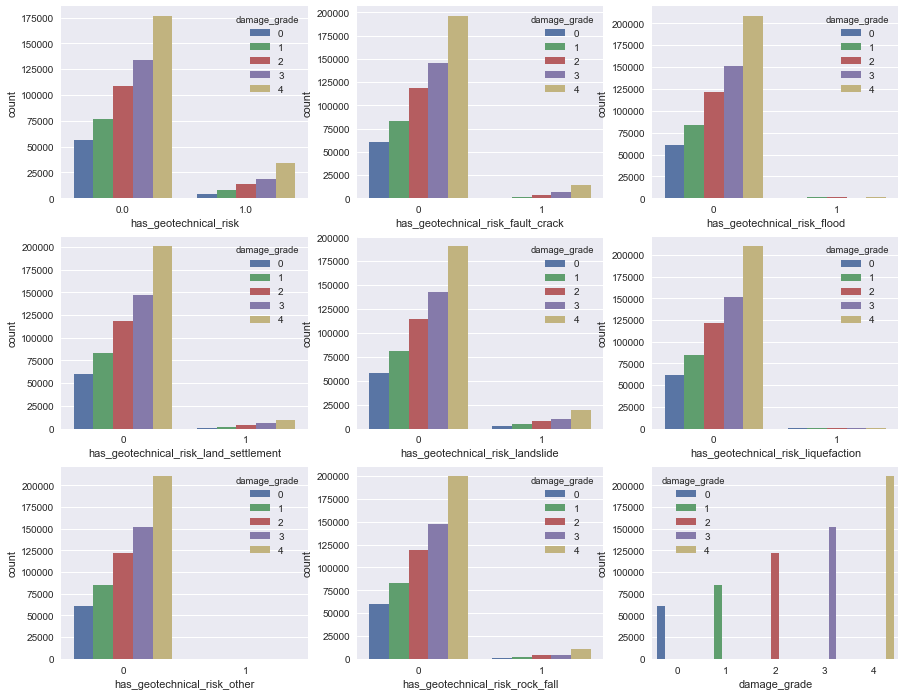

In [18]:
for i, var in zip(range(1, geotech_risk.shape[1]+1),geotech_risk.columns):
    plt.subplot(3,3,i)
    sns.countplot(var, data= geotech_risk, hue= 'damage_grade')
plt.show()

In [19]:
le= LabelEncoder()

In [20]:
train.isnull().sum().sort_values(ascending= False)[:4]

has_repair_started    33417
count_families            1
condition_post_eq         0
ward_id                   0
dtype: int64

In [21]:
train['has_repair_started'].fillna(train['has_repair_started'].mode()[0], inplace= True)
train['count_families'].fillna(train['count_families'].mode()[0], inplace= True)

test['has_repair_started'].fillna(test['has_repair_started'].mode()[0], inplace= True)
test['count_families'].fillna(test['count_families'].mode()[0], inplace= True)

In [21]:
train.fillna(-999, inplace= True)
test.fillna(-999, inplace= True)

In [22]:
for var in cat_var:
    #print(var)
    print(train[var].unique())

['Both' 'Building removed' 'Exterior' 'Not able to inspect' 'Interior']
['Private' 'Public' 'Other' 'Institutional']
['Flat' 'Steep slope' 'Moderate slope']
['Mud mortar-Stone/Brick' 'RC' 'Bamboo/Timber' 'Cement-Stone/Brick'
 'Other']
['Bamboo/Timber-Light roof' 'RCC/RB/RBC' 'Bamboo/Timber-Heavy roof']
['Mud' 'Brick/Stone' 'RC' 'Other' 'Timber']
['TImber/Bamboo-Mud' 'RCC/RB/RBC' 'Timber-Planck' 'Not applicable']
['Not attached' 'Attached-1 side' 'Attached-2 side' 'Attached-3 side']
['Rectangular' 'Square' 'L-shape' 'T-shape' 'Multi-projected' 'U-shape'
 'Others' 'E-shape' 'H-shape' 'Building with Central Courtyard']
['Damaged-Not used' 'Damaged-Repaired and used' 'Not damaged'
 'Damaged-Rubble clear' 'Damaged-Used in risk' 'Damaged-Rubble unclear'
 'Damaged-Rubble Clear-New building built' 'Covered by landslide']


In [23]:
train.shape, test.shape

((631761, 52), (421175, 51))

In [24]:
for var in cat_var:
    train[var]= le.fit_transform(train[var].astype(str))
    test[var]= le.fit_transform(test[var].astype(str))

In [25]:
seed= 2018
np.random.seed(seed)

In [26]:
target= train['damage_grade']
train.drop(['damage_grade'], axis= 1, inplace= True)
#test.drop(['damage_grade'], axis= 1, inplace= True)

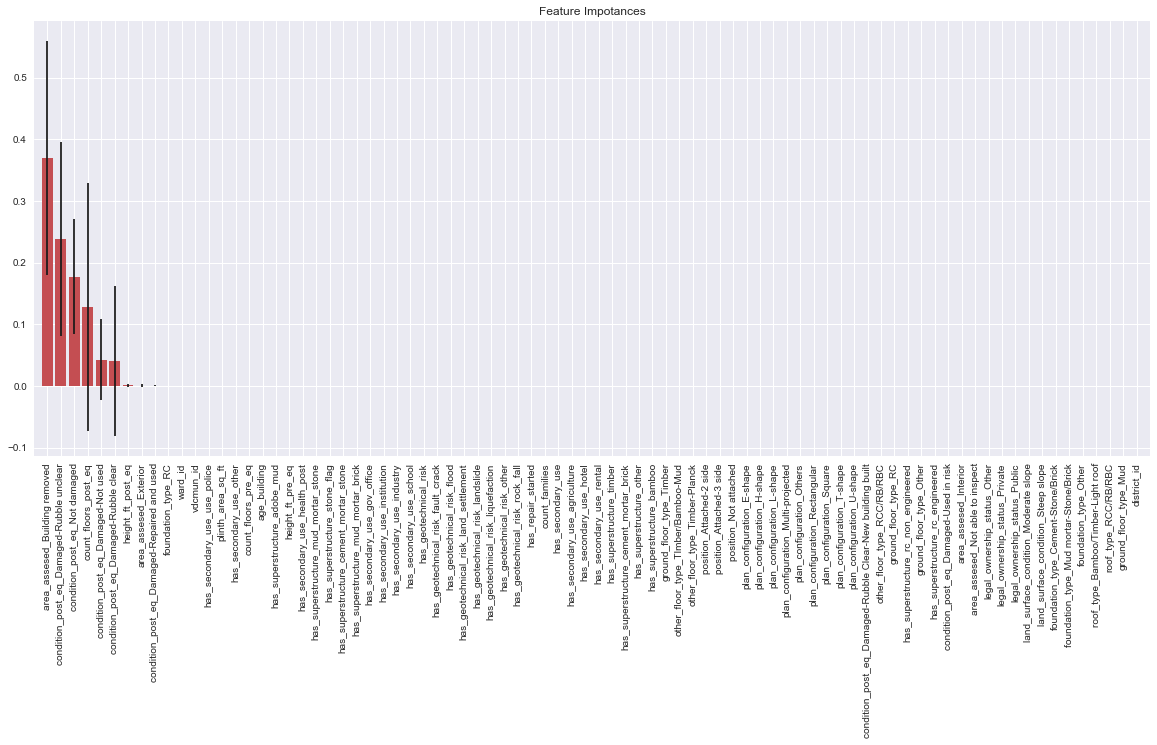

In [28]:
#now here I'm going to choose best parameters using the ExtraTreeClassifier
model= ExtraTreesClassifier(max_depth= 3, max_features= 0.8, random_state= seed)
model.fit(train, target)

##plot the importance
feat_names= train.columns.values
importances= model.feature_importances_
std= np.std([tree.feature_importances_ for tree in model.estimators_], axis= 0)
indices= np.argsort(importances)[::-1]

plt.figure(figsize= (20,8))
plt.title('Feature Impotances')
plt.bar(range(len(indices)), importances[indices], color= 'r', yerr= std[indices], align= 'center')
plt.xticks(range(len(indices)), feat_names[indices], rotation= 90)
plt.xlim([-1, len(indices)])
plt.show()

In [27]:
X_train, X_test, y_train, y_test= train_test_split(train, target, random_state= seed)

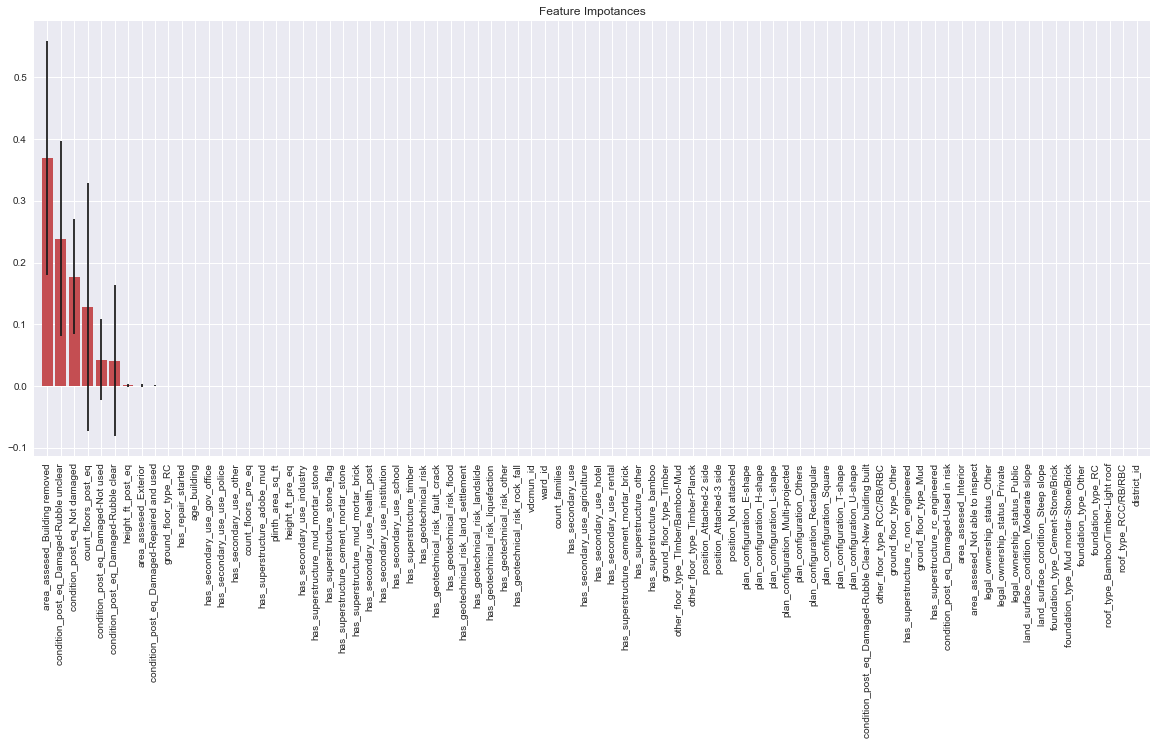

In [30]:
#now here I'm going to choose best parameters using the ExtraTreeClassifier
model= ExtraTreesClassifier(max_depth= 3, max_features= 0.8, random_state= seed)
model.fit(X_train, y_train)

##plot the importance
feat_names= X_train.columns.values
importances= model.feature_importances_
std= np.std([tree.feature_importances_ for tree in model.estimators_], axis= 0)
indices= np.argsort(importances)[::-1]

plt.figure(figsize= (20,8))
plt.title('Feature Impotances')
plt.bar(range(len(indices)), importances[indices], color= 'r', yerr= std[indices], align= 'center')
plt.xticks(range(len(indices)), feat_names[indices], rotation= 90)
plt.xlim([-1, len(indices)])
plt.show()

In [31]:
y_pred= model.predict(X_test)

In [32]:
from sklearn.metrics import roc_auc_score

In [33]:
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average= 'weighted')

C:\Users\sngupta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.6242014423107363, 0.5392226057422446)

In [28]:
#correlation method to find out the best features
train['damage_grade']= target

In [29]:
corr= train.corr()

In [30]:
target_corr= corr[(corr['damage_grade']>0.1) | (corr['damage_grade']<-0.1)]

In [33]:
corrmat= train[target_corr.index].corr()

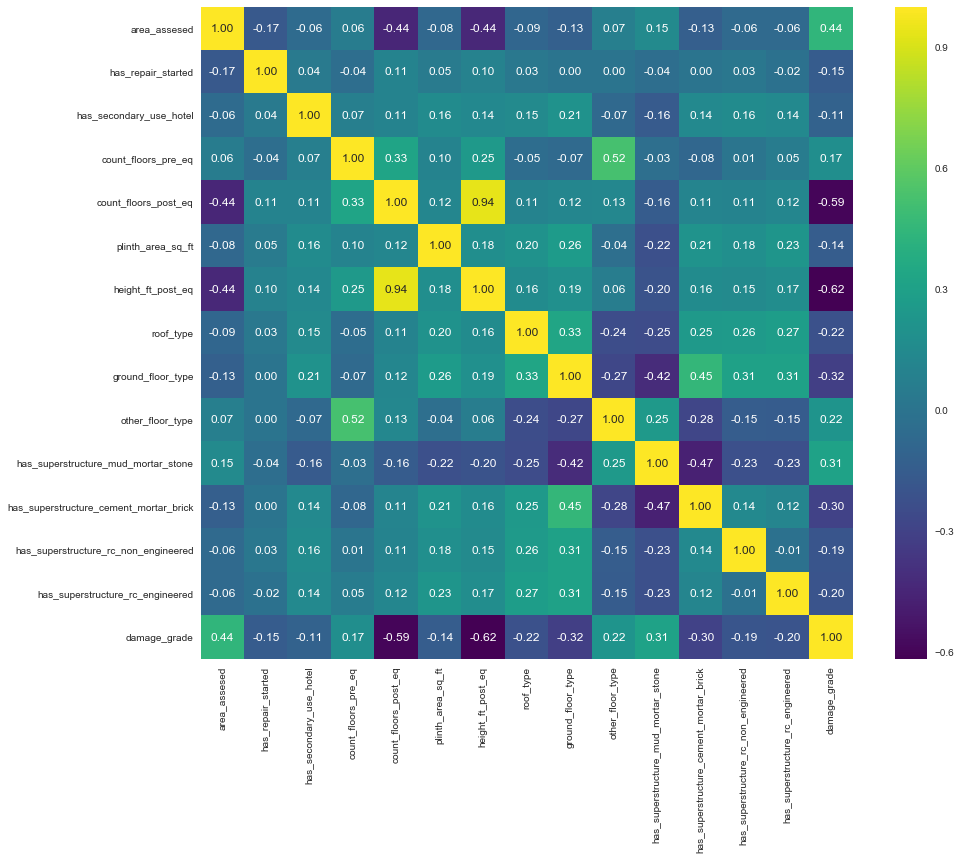

In [34]:
sns.heatmap(corrmat, square= True, annot= True, fmt= '.2f', cmap= 'viridis')
plt.show()

In [35]:
#now lets check out with the important features
train.drop(['damage_grade'], axis= 1, inplace= True)

In [36]:
target_corr_1= target_corr.index.tolist()

In [37]:
target_corr_1.remove('damage_grade')

In [39]:
X_train1, X_test1, y_train1, y_test1= train_test_split(train, target, random_state= seed, test_size= 0.15)

In [44]:
model= ExtraTreesClassifier(max_depth= 7, max_features= 0.8, random_state= seed, n_estimators= 200, n_jobs= 4)
model.fit(X_train1, y_train1)
y_pred= model.predict(X_test1)

accuracy_score(y_test1, y_pred), f1_score(y_test1, y_pred, average= 'weighted'), model.score(X_train1, y_train1)

(0.7095024534374506, 0.7114565372158843, 0.7121878002815664)

In [45]:
X_train2, X_test2, y_train2, y_test2= train_test_split(train[target_corr_1], target, test_size= 0.15, random_state= seed)

In [49]:
model= ExtraTreesClassifier(max_depth= 5, max_features= 0.8, n_estimators= 100, random_state= seed, n_jobs= 4)
model.fit(X_train2, y_train2)
y_pred= model.predict(X_test2)

accuracy_score(y_test2, y_pred), f1_score(y_test2, y_pred, average= 'weighted'), model.score(X_train2, y_train2)

(0.6398142774230993, 0.6173262615521098, 0.639729159993743)

In [53]:
def run_lgb(train_X, train_y, val_X, val_y, test_X, seed= seed):
    params = {
        "objective" : "multiclass",
        "metric" : "multi_logloss",
        "num_leaves" : 30,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : seed,
        "verbosity" : -1,
        "num_class": 5
    }
    
    lgtrain = lgbm.Dataset(train_X, label=train_y)
    lgval = lgbm.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgbm.train(params, lgtrain, 10000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=1000, evals_result=evals_result)
    
    pred_test_y = model.predict(test_X)
    return pred_test_y, model, evals_result

In [54]:
kf = KFold(n_splits=5, shuffle=True, random_state=2017)
pred_test_full = 0
for dev_index, val_index in kf.split(train):
    dev_X, val_X = train.loc[dev_index,:], train.loc[val_index,:]
    dev_y, val_y = target[dev_index], target[val_index]
    pred_test, model, evals_result = run_lgb(dev_X, dev_y, val_X, val_y, test)
    pred_test_full += pred_test
pred_test_full /= 5.
#pred_test_full = np.expm1(pred_test_full)

Training until validation scores don't improve for 100 rounds.
[1000]	valid_0's multi_logloss: 0.539777
[2000]	valid_0's multi_logloss: 0.529714
[3000]	valid_0's multi_logloss: 0.526009
Early stopping, best iteration is:
[3357]	valid_0's multi_logloss: 0.525512
Training until validation scores don't improve for 100 rounds.
[1000]	valid_0's multi_logloss: 0.543907
[2000]	valid_0's multi_logloss: 0.534163
[3000]	valid_0's multi_logloss: 0.531412
Early stopping, best iteration is:
[3161]	valid_0's multi_logloss: 0.53118
Training until validation scores don't improve for 100 rounds.
[1000]	valid_0's multi_logloss: 0.538781
[2000]	valid_0's multi_logloss: 0.52785
[3000]	valid_0's multi_logloss: 0.524092
Early stopping, best iteration is:
[3509]	valid_0's multi_logloss: 0.523301
Training until validation scores don't improve for 100 rounds.
[1000]	valid_0's multi_logloss: 0.539108
[2000]	valid_0's multi_logloss: 0.529456
[3000]	valid_0's multi_logloss: 0.525563
Early stopping, best iteration

In [55]:
pred_test_full

array([[3.89783987e-03, 2.66630389e-01, 4.22784864e-01, 3.06659843e-01,
        2.70633701e-05],
       [5.67142093e-11, 1.83028821e-06, 5.86205667e-06, 1.87567274e-05,
        9.99973551e-01],
       [1.07083821e-11, 3.66482567e-08, 2.78999061e-07, 4.59533020e-06,
        9.99995089e-01],
       ...,
       [9.99996077e-01, 1.49861571e-06, 4.16178467e-08, 1.78599453e-08,
        2.36504109e-06],
       [1.21080198e-12, 1.02761522e-08, 5.46273835e-09, 3.30202619e-08,
        9.99999951e-01],
       [2.81639090e-12, 3.90472809e-09, 3.07117145e-09, 8.05522405e-08,
        9.99999912e-01]])

In [56]:
pred_9= [np.argmax(line) for line in pred_test_full]

In [57]:
samp_9= pd.DataFrame({
    'building_id': test_building_id,
    'damage_grade': pred_9
})

samp_9['damage_grade']= samp_9['damage_grade'].map({0: 'Grade 1', 1: 'Grade 2', 2: 'Grade 3', 3: 'Grade 4', 4: 'Grade 5'})
samp_9.to_csv('sample_9.csv', index= False)

In [36]:
import pickle

In [59]:
with open('lightgbm_9.pickle', 'wb') as f:
    pickle.dump(model, f)

In [27]:
categorical_indices= np.where(train.dtypes!= np.float)[0]

In [32]:
def run_CB(train_X, train_y, val_X, val_y, test, cat_feature= categorical_indices, seed= 0):
    #X_train, X_test, y_train, y_test= train_test_split(train_2, target, random_state= seed)
    param_cb= {}
    param_cb['iterations']= 100
    param_cb['learning_rate']= 0.1
    param_cb['max_depth']= 3
    param_cb['logging_level']= 'Silent'
    param_cb['objective']= 'MultiClass'
    #param_cb['custom_metric']= ['Accuracy', 'F1']
    #param_cb['eval_metric']= 'Logloss'
    param_cb['random_seed']= seed
    #param_cb['one_hot_max_size']= 5
    model= cb.CatBoostClassifier(**param_cb)
    
    #fit the data into the model
    model.fit(train_X, train_y, categorical_indices, eval_set= (val_X, val_y), early_stopping_rounds= 10)
    prediction= model.predict(val_X)
    prediction_1= model.predict_proba(test)
    
    #accuracy
    print('Training accuracy: {:.4f}' .format(model.score(train_X, train_y)))
    print('Testing accuracy: {:.4f}' .format(accuracy_score(val_y, prediction)))
    print('f1 score: {}' .format(f1_score(val_y, prediction, average= 'weighted')))
    #print('Confusion Matrix: ')
    #print(confusion_matrix(y_test, prediction))
    #print('Classification Report: ')
    #print(classification_report(y_test, prediction))
    
    return prediction_1, model

In [33]:
kf = KFold(n_splits=5, shuffle=True, random_state=2017)
pred_test_full = 0
for dev_index, val_index in kf.split(train):
    dev_X, val_X = train.loc[dev_index,:], train.loc[val_index,:]
    dev_y, val_y = target[dev_index], target[val_index]
    pred_test, model= run_CB(dev_X, dev_y, val_X, val_y, test)
    pred_test_full += pred_test
pred_test_full /= 5.
#pred_test_full = np.expm1(pred_test_full)

Training accuracy: 0.7901
Testing accuracy: 0.7702
f1 score: 0.7725410957339304


KeyboardInterrupt: 

In [31]:
pred_test_full

array([[2.50390588e-02, 9.74960941e-01],
       [3.60809598e-04, 9.99639190e-01],
       [3.19488621e-04, 9.99680511e-01],
       ...,
       [9.98743381e-01, 1.25661887e-03],
       [1.79675384e-06, 9.99998203e-01],
       [1.79651748e-06, 9.99998203e-01]])

In [53]:
def run_CB(train, target, test, cat_feature= categorical_indices, seed= seed):
    
    X_train, X_test, y_train, y_test= train_test_split(train, target, test_size= 0.15, random_state= seed)
    pred_ori= 0
    #for seed in range(0, 5):
    param_cb= {}
    param_cb['iterations']= 25
    param_cb['learning_rate']= 0.1
    param_cb['max_depth']= 3
    param_cb['logging_level']= 'Silent'
    param_cb['objective']= 'MultiClass'
    #param_cb['custom_metric']= ['Accuracy', 'F1']
    #param_cb['eval_metric']= 'Logloss'
    param_cb['random_seed']= seed
    #param_cb['one_hot_max_size']= 5
    model= cb.CatBoostClassifier(**param_cb)

    #fit the data into the model
    model.fit(X_train, y_train, categorical_indices, eval_set= (X_test, y_test), early_stopping_rounds= 50, verbose= 100)
    prediction= model.predict(X_test)
    print(prediction[:10])
    prediction_1= model.predict_proba(test)
    print(prediction_1[:10])
    
    prediction_2= model.predict(test)
    print(prediction_2[:10])

    #prediction_1 += prediction_1

    #pred_ori= pred_ori + prediction_1
    #accuracy
    print('Seed:', seed)
    print('Training accuracy: {:.4f}' .format(model.score(X_train, y_train)))
    print('Testing accuracy: {:.4f}' .format(accuracy_score(y_test, prediction)))
    print('f1 score: {}' .format(f1_score(y_test, prediction, average= 'weighted')))
    #print('Confusion Matrix: ')
    #print(confusion_matrix(y_test, prediction))
    #print('Classification Report: ')
    #print(classification_report(y_test, prediction))

    return prediction_2, prediction_1, model

In [54]:
pred_10, pred_prob_10, model= run_CB(train, target, test)

0:	learn: -1.4188986	test: -1.4191646	best: -1.4191646 (0)	total: 1m 24s	remaining: 33m 56s
24:	learn: -0.6676122	test: -0.6605057	best: -0.6605057 (24)	total: 18m 10s	remaining: 0us

bestTest = -0.6605056929
bestIteration = 24

Shrink model to first 25 iterations.
[[3.]
 [3.]
 [2.]
 [2.]
 [3.]
 [4.]
 [4.]
 [4.]
 [0.]
 [2.]]
[[0.05195586 0.32939515 0.45030998 0.14319261 0.0251464 ]
 [0.01593628 0.01568532 0.01592125 0.01623127 0.93622587]
 [0.01592383 0.0156748  0.01591755 0.01620694 0.93627688]
 [0.05143546 0.28056282 0.39150025 0.23417112 0.04233035]
 [0.01591202 0.01567954 0.01590673 0.01615912 0.93634258]
 [0.06275583 0.27095743 0.39605036 0.22807142 0.04216497]
 [0.04779774 0.31238205 0.46511847 0.15047434 0.0242274 ]
 [0.01686932 0.01675866 0.01648384 0.01675644 0.93313174]
 [0.07221373 0.43050122 0.36053658 0.11575128 0.02099719]
 [0.05176171 0.21818428 0.37307525 0.31334061 0.04363815]]
[[2.]
 [4.]
 [4.]
 [2.]
 [4.]
 [2.]
 [2.]
 [4.]
 [1.]
 [2.]]
Seed: 2018
Training accuracy: 0

In [32]:
def run_CB(train, target, test, cat_feature= categorical_indices, seed= seed):
    
    X_train, X_test, y_train, y_test= train_test_split(train, target, test_size= 0.15, random_state= seed)
    pred_ori= 0
    #for seed in range(0, 5):
    param_cb= {}
    param_cb['iterations']= 200
    param_cb['learning_rate']= 0.1
    param_cb['max_depth']= 3
    param_cb['logging_level']= 'Silent'
    param_cb['objective']= 'MultiClass'
    #param_cb['custom_metric']= ['Accuracy', 'F1']
    #param_cb['eval_metric']= 'Logloss'
    param_cb['random_seed']= seed
    #param_cb['one_hot_max_size']= 5
    model= cb.CatBoostClassifier(**param_cb)

    #fit the data into the model
    model.fit(X_train, y_train, categorical_indices, eval_set= (X_test, y_test), early_stopping_rounds= 50, verbose= 100)
    prediction= model.predict(X_test)
    print(prediction[:10])
    prediction_1= model.predict_proba(test)
    print(prediction_1[:10])
    
    prediction_2= model.predict(test)
    print(prediction_2[:10])

    #prediction_1 += prediction_1

    #pred_ori= pred_ori + prediction_1
    #accuracy
    print('Seed:', seed)
    print('Training accuracy: {:.4f}' .format(model.score(X_train, y_train)))
    print('Testing accuracy: {:.4f}' .format(accuracy_score(y_test, prediction)))
    print('f1 score: {}' .format(f1_score(y_test, prediction, average= 'weighted')))
    #print('Confusion Matrix: ')
    #print(confusion_matrix(y_test, prediction))
    #print('Classification Report: ')
    #print(classification_report(y_test, prediction))

    return prediction_2, prediction_1, model

In [33]:
pred_11, pred_prob_11, model1= run_CB(train, target, test)

0:	learn: -1.4188986	test: -1.4191646	best: -1.4191646 (0)	total: 13.6s	remaining: 45m 13s
100:	learn: -0.5457412	test: -0.5346416	best: -0.5346416 (100)	total: 25m 2s	remaining: 24m 32s
199:	learn: -0.5219351	test: -0.5092362	best: -0.5092362 (199)	total: 41m 47s	remaining: 0us

bestTest = -0.5092362046
bestIteration = 199

Shrink model to first 200 iterations.
[[3.]
 [2.]
 [2.]
 [2.]
 [3.]
 [4.]
 [4.]
 [4.]
 [0.]
 [2.]]
[[2.37386151e-02 2.84452857e-01 5.50498874e-01 1.38064407e-01
  3.24524742e-03]
 [1.57036392e-04 5.03296897e-04 9.24811348e-04 2.59479479e-03
  9.95820061e-01]
 [7.44766577e-05 2.26536273e-04 4.18580927e-04 1.55861935e-03
  9.97721787e-01]
 [1.11103374e-02 1.69302919e-01 5.56711556e-01 2.57053852e-01
  5.82133456e-03]
 [2.05410744e-05 9.42763122e-05 1.96659801e-04 9.41264304e-04
  9.98747259e-01]
 [6.56445240e-03 1.93223554e-01 5.25519363e-01 2.63682994e-01
  1.10096365e-02]
 [9.45951268e-03 2.23430225e-01 6.61435342e-01 1.04195725e-01
  1.47919527e-03]
 [6.84763956e-

In [36]:
pred_12= pred_11.reshape(-1, 1)

In [44]:
pred_11[:10]

array([[2.],
       [4.],
       [4.],
       [2.],
       [4.],
       [2.],
       [2.],
       [4.],
       [2.],
       [2.]])

In [52]:
pred_12= [sc[0] for sc in pred_11]

In [54]:
pred_12[:10]

[2.0, 4.0, 4.0, 2.0, 4.0, 2.0, 2.0, 4.0, 2.0, 2.0]

In [55]:
samp_10= pd.DataFrame({
    'building_id': test_building_id,
    'damage_grade': pred_12
})

samp_10['damage_grade']= samp_10['damage_grade'].map({0: 'Grade 1', 1: 'Grade 2', 2: 'Grade 3', 3: 'Grade 4', 4: 'Grade 5'})
samp_10.to_csv('sample_10.csv', index= False)

In [28]:
def run_CB(train, target, test, cat_feature= categorical_indices, seed= seed):
    
    X_train, X_test, y_train, y_test= train_test_split(train, target, test_size= 0.15, random_state= seed)
    pred_ori= 0
    #for seed in range(0, 5):
    param_cb= {}
    param_cb['iterations']= 200
    param_cb['learning_rate']= 1
    param_cb['max_depth']= 3
    param_cb['logging_level']= 'Silent'
    param_cb['objective']= 'MultiClass'
    #param_cb['custom_metric']= ['Accuracy', 'F1']
    #param_cb['eval_metric']= 'Logloss'
    param_cb['random_seed']= seed
    #param_cb['one_hot_max_size']= 5
    model= cb.CatBoostClassifier(**param_cb)

    #fit the data into the model
    model.fit(X_train, y_train, categorical_indices, eval_set= (X_test, y_test), early_stopping_rounds= 50, verbose= 100)
    prediction= model.predict(X_test)
    print(prediction[:10])
    prediction_1= model.predict_proba(test)
    print(prediction_1[:10])
    
    prediction_2= model.predict(test)
    print(prediction_2[:10])

    #prediction_1 += prediction_1

    #pred_ori= pred_ori + prediction_1
    #accuracy
    print('Seed:', seed)
    print('Training accuracy: {:.4f}' .format(model.score(X_train, y_train)))
    print('Testing accuracy: {:.4f}' .format(accuracy_score(y_test, prediction)))
    print('f1 score: {}' .format(f1_score(y_test, prediction, average= 'weighted')))
    #print('Confusion Matrix: ')
    #print(confusion_matrix(y_test, prediction))
    #print('Classification Report: ')
    #print(classification_report(y_test, prediction))

    return prediction_2, prediction_1, model

In [29]:
pred_13, pred_prob_13, model3= run_CB(train, target, test)

0:	learn: -0.7843531	test: -0.7856387	best: -0.7856387 (0)	total: 11.8s	remaining: 39m 12s
100:	learn: -inf	test: -inf	best: -0.5038894 (81)	total: 19m 46s	remaining: 19m 22s
Stopped by overfitting detector  (50 iterations wait)

bestTest = -0.5038893504
bestIteration = 81

Shrink model to first 82 iterations.
[[3.]
 [2.]
 [2.]
 [2.]
 [3.]
 [4.]
 [4.]
 [4.]
 [0.]
 [2.]]
[[1.14435363e-02 2.11825469e-01 6.07749768e-01 1.66404384e-01
  2.57684212e-03]
 [3.13247318e-07 1.81040701e-06 6.65309987e-06 5.66408844e-05
  9.99934582e-01]
 [1.72678161e-07 1.05682079e-06 2.62227067e-06 6.83948782e-05
  9.99927753e-01]
 [1.31271010e-02 2.32190739e-01 5.88888496e-01 1.64984338e-01
  8.09325036e-04]
 [1.30653711e-08 1.63386498e-07 6.34934513e-07 1.38198085e-05
  9.99985369e-01]
 [1.98052552e-04 1.67805414e-01 3.67651832e-01 4.59360603e-01
  4.98409831e-03]
 [6.62425883e-03 3.07490156e-01 5.17131530e-01 1.68287844e-01
  4.66211226e-04]
 [2.42913106e-07 2.75096258e-06 5.55680417e-06 8.32109135e-05
  9.9

In [31]:
pred_14= [sc[0] for sc in pred_13]

In [32]:
samp_11= pd.DataFrame({
    'building_id': test_building_id,
    'damage_grade': pred_14
})

samp_11['damage_grade']= samp_11['damage_grade'].map({0: 'Grade 1', 1: 'Grade 2', 2: 'Grade 3', 3: 'Grade 4', 4: 'Grade 5'})
samp_11.to_csv('sample_11.csv', index= False)

In [33]:
def run_CB(train, target, test, cat_feature= categorical_indices, seed= seed):
    
    X_train, X_test, y_train, y_test= train_test_split(train, target, test_size= 0.15, random_state= seed)
    pred_ori= 0
    #for seed in range(0, 5):
    param_cb= {}
    param_cb['iterations']= 200
    param_cb['learning_rate']= 1
    #param_cb['max_depth']= 3
    param_cb['logging_level']= 'Silent'
    param_cb['objective']= 'MultiClass'
    #param_cb['custom_metric']= ['Accuracy', 'F1']
    #param_cb['eval_metric']= 'Logloss'
    param_cb['random_seed']= seed
    #param_cb['one_hot_max_size']= 5
    model= cb.CatBoostClassifier(**param_cb)

    #fit the data into the model
    model.fit(X_train, y_train, categorical_indices, eval_set= (X_test, y_test), early_stopping_rounds= 50, verbose= 100)
    prediction= model.predict(X_test)
    print(prediction[:10])
    prediction_1= model.predict_proba(test)
    print(prediction_1[:10])
    
    prediction_2= model.predict(test)
    print(prediction_2[:10])

    #prediction_1 += prediction_1

    #pred_ori= pred_ori + prediction_1
    #accuracy
    print('Seed:', seed)
    print('Training accuracy: {:.4f}' .format(model.score(X_train, y_train)))
    print('Testing accuracy: {:.4f}' .format(accuracy_score(y_test, prediction)))
    print('f1 score: {}' .format(f1_score(y_test, prediction, average= 'weighted')))
    #print('Confusion Matrix: ')
    #print(confusion_matrix(y_test, prediction))
    #print('Classification Report: ')
    #print(classification_report(y_test, prediction))

    return prediction_2, prediction_1, model

In [34]:
pred_15, pred_proba_15, model4= run_CB(train, target, test)

0:	learn: -0.7320432	test: -0.7308166	best: -0.7308166 (0)	total: 25.6s	remaining: 1h 24m 58s
100:	learn: -0.4975656	test: -0.4990662	best: -0.4989119 (94)	total: 1h 5m 40s	remaining: 1h 4m 22s
199:	learn: -0.4853589	test: -0.4979494	best: -0.4976187 (178)	total: 2h 24m 44s	remaining: 0us

bestTest = -0.4976187063
bestIteration = 178

Shrink model to first 179 iterations.
[[3.]
 [2.]
 [2.]
 [2.]
 [3.]
 [4.]
 [4.]
 [4.]
 [0.]
 [2.]]
[[2.35434277e-02 2.19495810e-01 6.36024315e-01 1.20759694e-01
  1.76752559e-04]
 [1.56110961e-06 4.07588871e-06 3.42661096e-05 5.15685001e-05
  9.99908528e-01]
 [6.58484353e-09 7.19488747e-07 6.03355072e-07 5.06586539e-06
  9.99993605e-01]
 [3.53312493e-03 1.65540421e-01 5.70884355e-01 2.60016680e-01
  2.54187859e-05]
 [1.77922582e-10 6.13583246e-08 2.71691788e-07 1.30031016e-07
  9.99999537e-01]
 [1.62457069e-05 1.18583052e-01 4.22167573e-01 4.55430009e-01
  3.80311956e-03]
 [3.52245782e-03 2.51704031e-01 6.40864203e-01 1.03891146e-01
  1.81626530e-05]
 [3.

In [37]:
with open('final_model.pickle', 'wb') as f:
    pickle.dump(model4, f)

In [38]:
pred_16= [sc[0] for sc in pred_15]

In [39]:
samp_12= pd.DataFrame({
    'building_id': test_building_id,
    'damage_grade': pred_16
})

samp_12['damage_grade']= samp_12['damage_grade'].map({0: 'Grade 1', 1: 'Grade 2', 2: 'Grade 3', 3: 'Grade 4', 4: 'Grade 5'})
samp_12.to_csv('sample_12.csv', index= False)